### PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow


In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.1.0+cu121'

### Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text


Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *know* data using the linear regression formula:

y = a + bX
where x is the explanatory variable and y is the dependent variable.

We'll use a linear regression formula to make a straight line with known parameters.

In [ ]:
# Create *known* parameters
weight = 0.7 #b
bias = 0.3 #a

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze adds extra brackets
y = weight * X + bias

X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data

In [ ]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How can we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

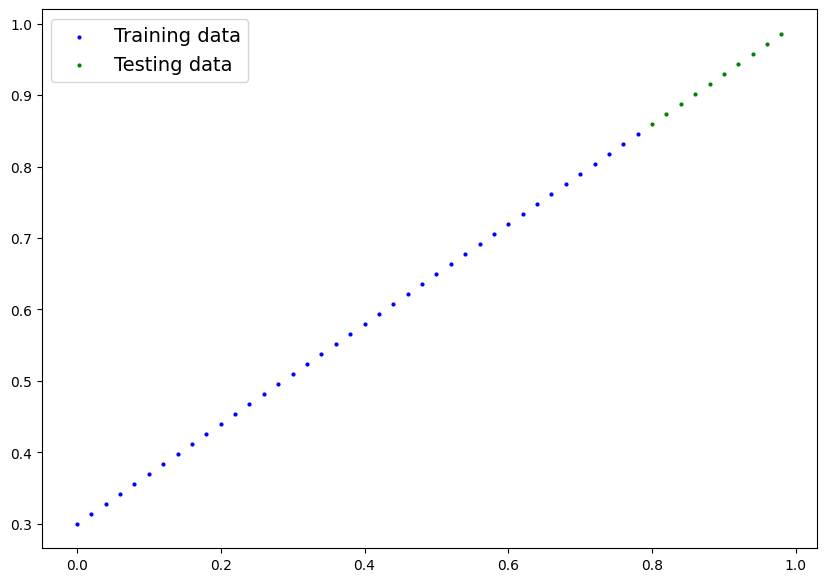

In [ ]:
def plot_predictions(train_data=X_train, train_labels = y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  # Plots training data, test data, and compares predicitions

  plt.figure(figsize = (10,7))

  # Plot training in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictons if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

plot_predictions()

### Build model

Our first PyTorch model

What our model does:
* Start with random values (weight and bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [ ]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input
    return self.weights * x + self.bias # this is the linear regression formula



In [ ]:
torch.randn(1)

tensor([0.2804])

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward(), All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation



### Checking the contents of our PyTorch

Now we have created a model, let's see what's inside....

We can check our model parameters or what's inside our model using `.parameters()`.

In [ ]:
# Create a random seed
import torch
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can do something similar with torch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

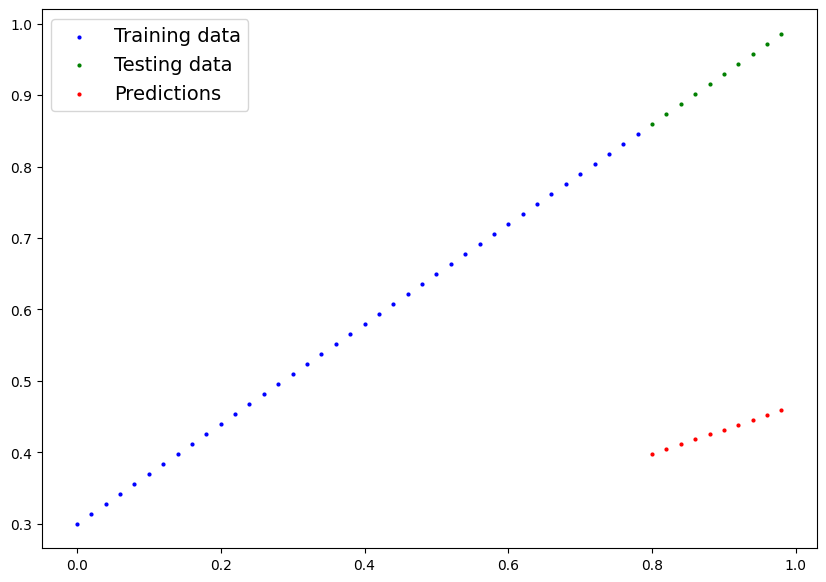

In [ ]:
plot_predictions(predictions=y_preds)

## Train a model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words, from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong you model's predictions are to the ideal outputs. Lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function.


> * Inside the optimizer you will have to set two parameters:
      * params - the model parameters you want to optimize, for example
      params=model_0.parameters()
      * lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changers the parameters with each step (a small lr results in small changes, a large lr results in large changes)










And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()


# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.001) # lr = learning rate = possibly the most important hyperparameter you can set
                                       # The smaller the lr, the smaller the change in parameter

**Q**: Which loss function and optimizer should I use?
**A**: This will be problem specific. For example, for a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.

But for a classification problem, like classifying whether a photo is of a dog or a cat, you will likely want to use a loss function of nn.BCELoss() (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do....
1. Forward pass/propagation (this involves data moving through our model's `forward()` functions) to make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradient of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters(**gradient descent**)

In [ ]:
# An epoch is one loop through the data.... (this is a hyperparameter because we set it ourselves)
epochs = 10000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train) # y = ax + b

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perfrom backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # By default, how the optimizer changes will accumulate through the loop
  # so we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/ batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print what's happening
  if epoch % 1000 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())



Epoch: 0 | loss: 0.31288138031959534 | Test loss: 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Epoch: 1000 | loss: 0.02435956709086895 | Test loss: 0.05690721794962883
OrderedDict([('weights', tensor([0.5790])), ('bias', tensor([0.3508]))])
Epoch: 2000 | loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 3000 | loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 4000 | loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 5000 | loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.6997])), ('bias', tensor([0.3008]))])
Epoch: 6000 | loss: 0.0004444979131221771 | Test loss: 0.0005780101055279374
OrderedDict([('weights', tensor([0.

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.31288138, 0.02435957, 0.0004445 , 0.0004445 , 0.0004445 ,
        0.0004445 , 0.0004445 , 0.0004445 , 0.0004445 , 0.0004445 ],
       dtype=float32),
 [tensor(0.4932),
  tensor(0.0569),
  tensor(0.0006),
  tensor(0.0006),
  tensor(0.0006),
  tensor(0.0006),
  tensor(0.0006),
  tensor(0.0006),
  tensor(0.0006),
  tensor(0.0006)])

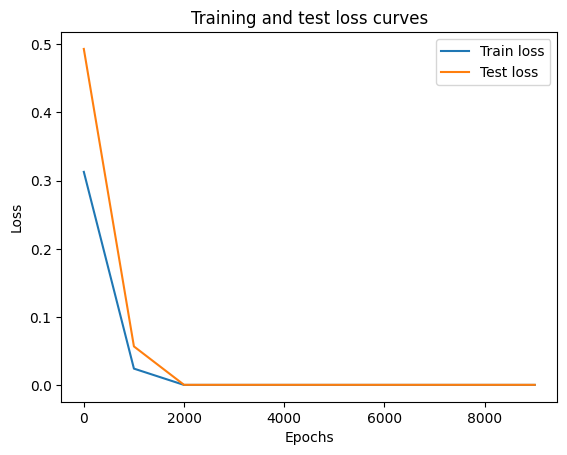

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label= "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
weight, bias

(0.7, 0.3)

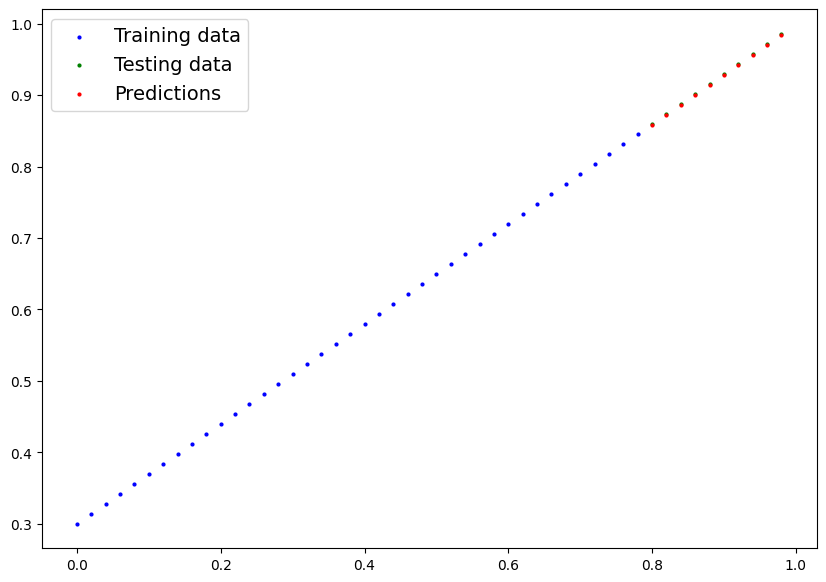

In [ ]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch

There ae three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch project
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Feb 10 07:07 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved out model's `state_dict()` instead of the entire model, we will create a new instance of our model class and load the save saved `state_dict()` into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [ ]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [ ]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place

In [ ]:
# Import PyTorch and matplot lib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code.

This means if we have access to a GPU, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight*X + bias
X[:10], y[:10] # [:10] means from the beginning upto 10(not including 10), [10:] means from 10 to the end of the tensor


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

In [ ]:
def plot_predictions(train_data=X_train, train_labels = y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  # Plots training data, test data, and compares predicitions

  plt.figure(figsize = (10,7))

  # Plot training in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictons if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

In [ ]:
# Plot the data
# Note: if you do not ahve the plot_predictions() function loaded (function in section 3), this will result in an error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters/ also called: Linear transform, probing layer, fully connected layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1) # input and output of size 1

  def forward(self, x: torch.Tensor)->torch.Tensor: # Override the default forward method # returns a torch tensor
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Set up the loss function
loss_fn = nn.L1Loss() # same as MAE

# Set up our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 2000

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 200 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 1000 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 1100 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 1200 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 1300 | Loss: 0.00

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weight,bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

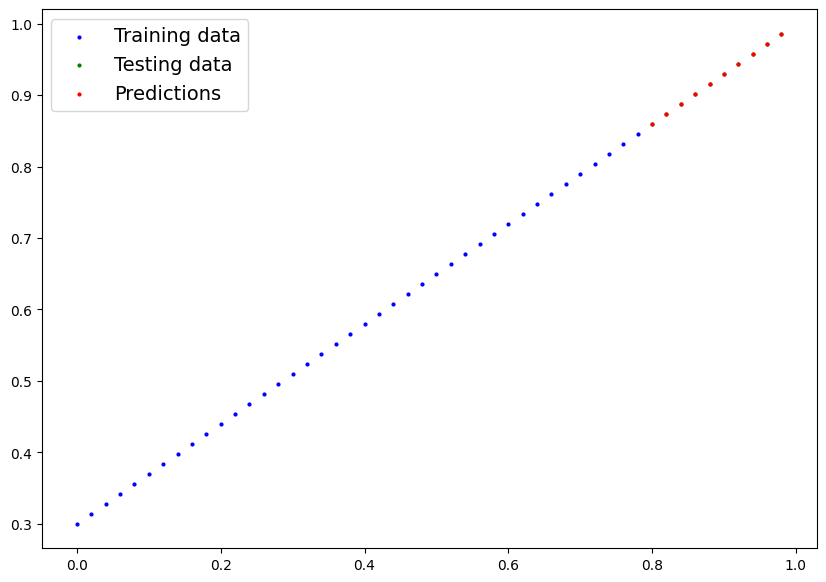

In [ ]:
# Check out our model predicitions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & loading a trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# Load a PyTorch

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Exercises
1. Create a straight line dataset using the linear regression formula (weight * X + bias).
*   Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
*   Split the data into 80% training, 20% testing.
*   Plot the training and testing data so it becomes visual.

2. Build a PyTorch model by subclassing nn.Module.
*   Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
*   Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
*   Once you've constructed the model, make an instance of it and check its state_dict().
*   Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
*   Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
*   Write a training loop to perform the appropriate training steps for 300 epochs.
*   The training loop should test the model on the test dataset every 20 epochs.

4. Make predictions with the trained model on the test data.
*   Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

5. Save your trained model's state_dict() to file.
*   Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
*   Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.









In [1]:
import torch
from torch import nn
import numpy
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


This is x: tensor([[  0],
        [  2],
        [  4],
        [  6],
        [  8],
        [ 10],
        [ 12],
        [ 14],
        [ 16],
        [ 18],
        [ 20],
        [ 22],
        [ 24],
        [ 26],
        [ 28],
        [ 30],
        [ 32],
        [ 34],
        [ 36],
        [ 38],
        [ 40],
        [ 42],
        [ 44],
        [ 46],
        [ 48],
        [ 50],
        [ 52],
        [ 54],
        [ 56],
        [ 58],
        [ 60],
        [ 62],
        [ 64],
        [ 66],
        [ 68],
        [ 70],
        [ 72],
        [ 74],
        [ 76],
        [ 78],
        [ 80],
        [ 82],
        [ 84],
        [ 86],
        [ 88],
        [ 90],
        [ 92],
        [ 94],
        [ 96],
        [ 98],
        [100],
        [102],
        [104],
        [106],
        [108],
        [110],
        [112],
        [114],
        [116],
        [118],
        [120],
        [122],
        [124],
        [126],
        [128],
        [130],

Text(0.5, 0, 'x values')

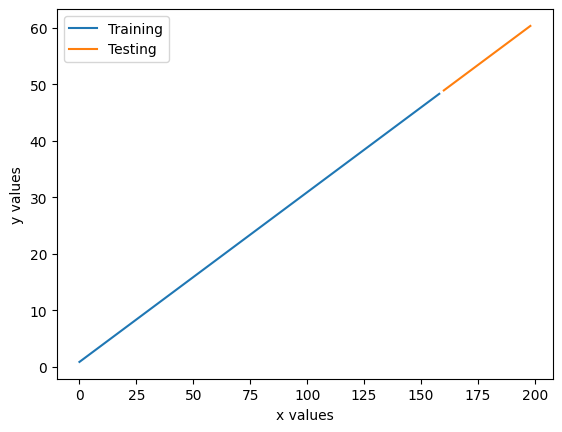

In [19]:
weight = 0.3
bias = 0.9

x = torch.arange(0,200, 2).unsqueeze(dim=1) # End is not inclusive # don't forget to use unsqueeze as it causes size error
y = weight*x + bias

training_dataset_y, training_data_x = y[:80], (x[:80])
testing_dataset_y, testing_data_x = y[80:], (x[80:])

print(f"This is x: {training_data_x}")
print(f"This is the training dataset:{training_dataset_y}")
print(f"This is x: {testing_data_x}")
print(f"This is the testing dataset:{testing_dataset_y}")

plt.plot(training_data_x,training_dataset_y)
plt.plot(testing_data_x,testing_dataset_y)
plt.legend(["Training", "Testing"])
plt.ylabel("y values")
plt.xlabel("x values")

In [20]:
class LRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.l = nn.Linear(in_features = 1, out_features = 1)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.l(x)

torch.manual_seed(42)
model2 = LRegression()
model2, model2.state_dict()


(LRegression(
   (l): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('l.weight', tensor([[0.7645]])), ('l.bias', tensor([0.8300]))]))

In [23]:
loss = torch.nn.L1Loss()
optimizer = torch.optim.SGD(model2.parameters(), lr=0.001)

In [40]:
epochs = 300
for epoch in range(epochs):

  y_preds = model2(training_data_x.float())

  training_loss = loss(y_preds, training_dataset_y)

  optimizer.zero_grad()

  training_loss.backward()

  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_pred = model2(testing_data_x.float())
    test_loss = loss(test_pred, testing_dataset_y)

  if epoch%20 == 0:
    print(f"Epoch: {epoch} | Training loss: {training_loss} | Test loss: {test_loss}")

Epoch: 0 | Training loss: 0.7971495389938354 | Test loss: 12.398700714111328
Epoch: 20 | Training loss: 0.7969003915786743 | Test loss: 12.398950576782227
Epoch: 40 | Training loss: 0.7966499328613281 | Test loss: 12.399202346801758
Epoch: 60 | Training loss: 0.7964007258415222 | Test loss: 12.399453163146973
Epoch: 80 | Training loss: 0.7961515188217163 | Test loss: 12.399700164794922
Epoch: 100 | Training loss: 0.7959010004997253 | Test loss: 12.39995002746582
Epoch: 120 | Training loss: 0.7956517934799194 | Test loss: 12.400201797485352
Epoch: 140 | Training loss: 0.7954014539718628 | Test loss: 12.400453567504883
Epoch: 160 | Training loss: 0.7951522469520569 | Test loss: 12.400699615478516
Epoch: 180 | Training loss: 0.7949017882347107 | Test loss: 12.400949478149414
Epoch: 200 | Training loss: 0.7946525812149048 | Test loss: 12.401201248168945
Epoch: 220 | Training loss: 0.7944021224975586 | Test loss: 12.401447296142578
Epoch: 240 | Training loss: 0.7941535711288452 | Test loss:

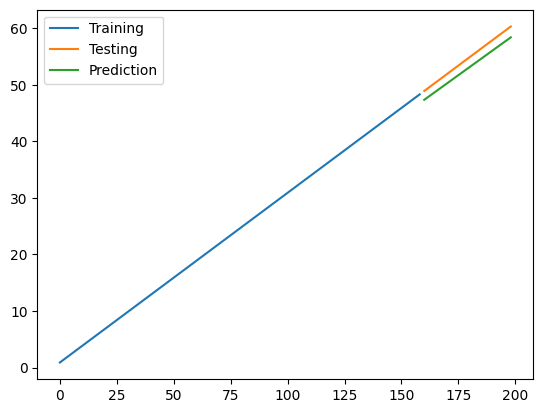

In [41]:
plt.plot(training_data_x, training_dataset_y)
plt.plot(testing_data_x, testing_dataset_y)
plt.plot(testing_data_x,test_pred.detach().numpy())

plt.legend(["Training", "Testing", "Prediction"])

In [43]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model2.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth
